<a href="https://colab.research.google.com/github/RIzmaylov/GB_Introduction-to-Python/blob/main/Seminar_05_2/Seminar_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача №63**. Решение в группах
1. Изобразите отношение `households` к `population` с
помощью точечного графика
2. Визуализировать `longitude` по отношения к
`median_house_value`, используя линейный график
3. Представить гистограмму по `housing_median_age`
4. Изобразить гистограмму по `median_house_value` с
оттенком `housing_median_age`

In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Изобразите отношение households к population с помощью точечного графика

<Axes: xlabel='households', ylabel='population'>

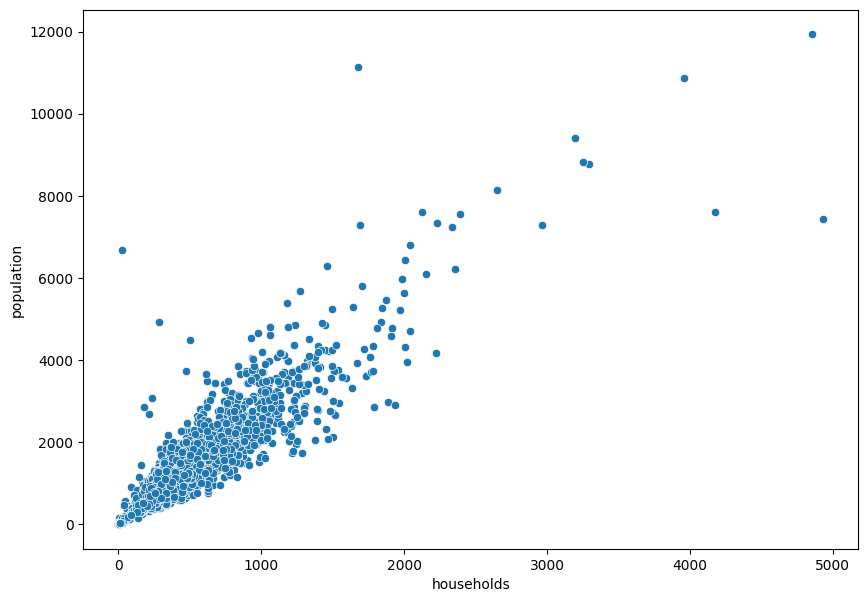

In [34]:
plt.figure(figsize = (10, 7))
sns.scatterplot(df, x = 'households', y = 'population')

Визуализировать longitude по отношения к median_house_value, используя линейный график

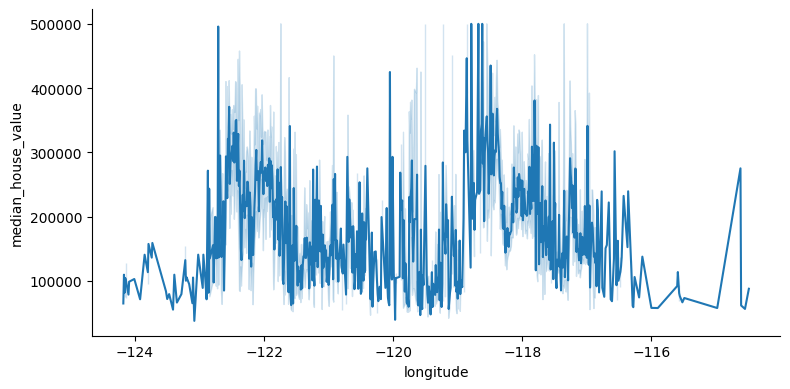

In [35]:
sns.relplot(data = df, x = 'longitude', y = 'median_house_value', kind = 'line', aspect = 2, height = 4); # aspect - изменить пропорции, height - высота, ; - убирает надпись над графиком

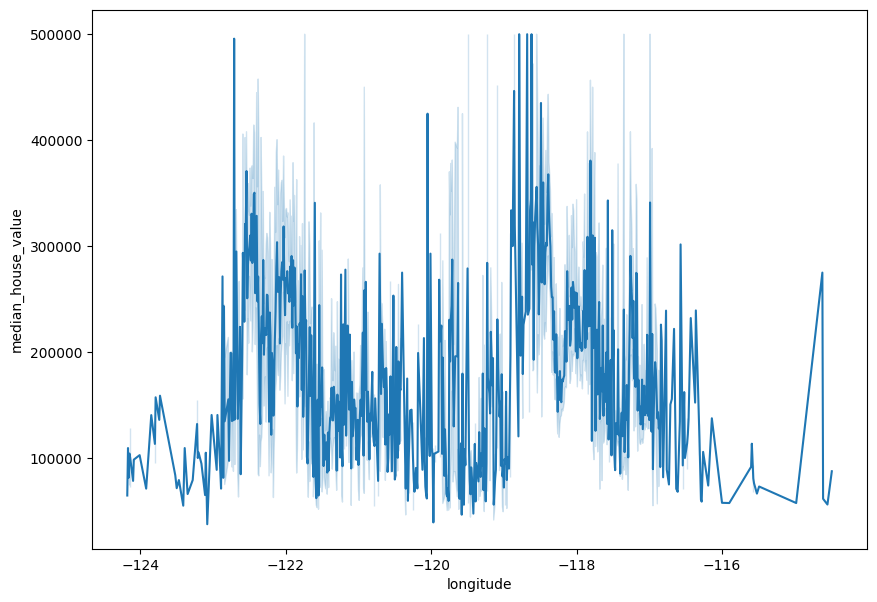

In [36]:
plt.figure(figsize = (10, 7))
sns.lineplot(data = df, x = 'longitude', y = 'median_house_value');

Представить гистограмму по housing_median_age

''

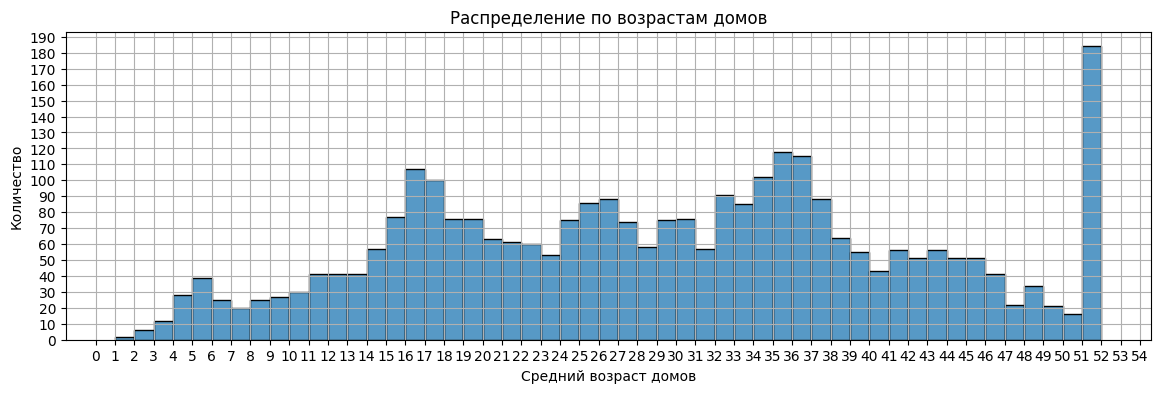

In [37]:
plt.figure(figsize = (14, 4))
sns.histplot(data = df, x = 'housing_median_age', bins = 51)

plt.title('Распределение по возрастам домов')
plt.ylabel('Количество')
plt.xlabel('Средний возраст домов')
plt.xticks(range(0, 55))        # градация сетки по х
plt.yticks(range(0, 200, 10))   # градация сетки по у
plt.grid()                      # сетка

;

Изобразить гистограмму по median_house_value с оттенком housing_median_age

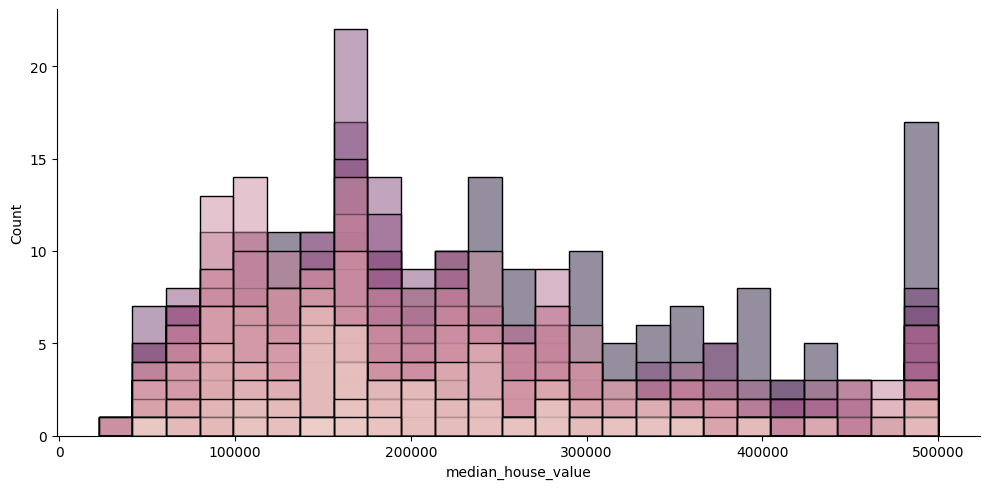

In [38]:
sns.displot(data = df, x = 'median_house_value', hue = 'housing_median_age', aspect = 2, legend = False);     # legend - вкл/выкл легенды

---
**Задача №65**. Решение в группах

Написать EDA для датасета про пингвинов

Необходимо:

- Использовать 2-3 точечных графика
- Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile
- Использовать PairGrid с типом графика на ваш выбор
- Изобразить Heatmap
- Использовать 2-3 гистограммы

Чтобы подключить датасет с
пингвинами, воспользуйтесь данным
скриптом:
```
penguins = sns.load_dataset("penguins")
penguins.head()
```



In [39]:
df = sns.load_dataset('penguins')
df.sample(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
78,Adelie,Torgersen,36.2,16.1,187.0,3550.0,Female
274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


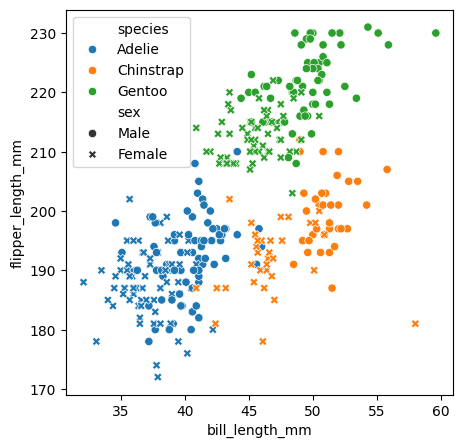

In [40]:
plt.figure(figsize = (5, 5))
sns.scatterplot(df, x = 'bill_length_mm', y = 'flipper_length_mm', hue = 'species', style = 'sex');

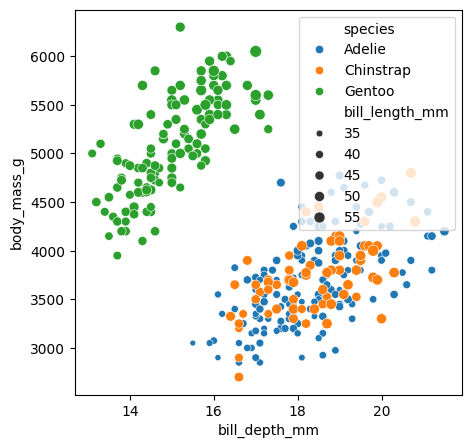

In [41]:
plt.figure(figsize = (5, 5))
sns.scatterplot(df, x = 'bill_depth_mm', y = 'body_mass_g', hue = 'species', size = 'bill_length_mm');

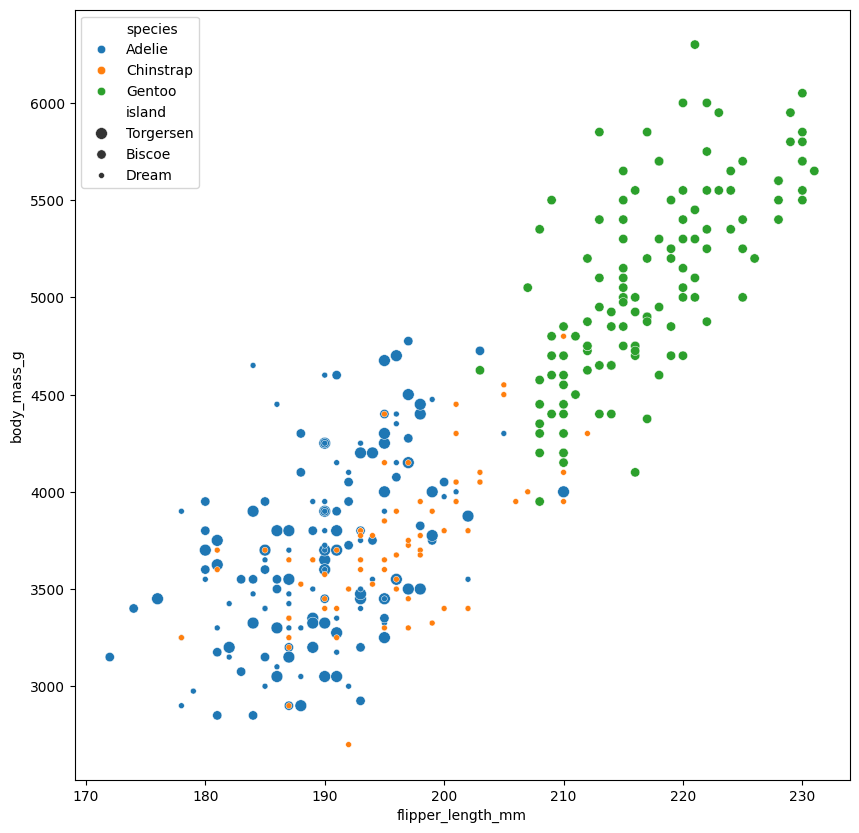

In [42]:
plt.figure(figsize = (10, 10))
sns.scatterplot(df, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', size = 'island');

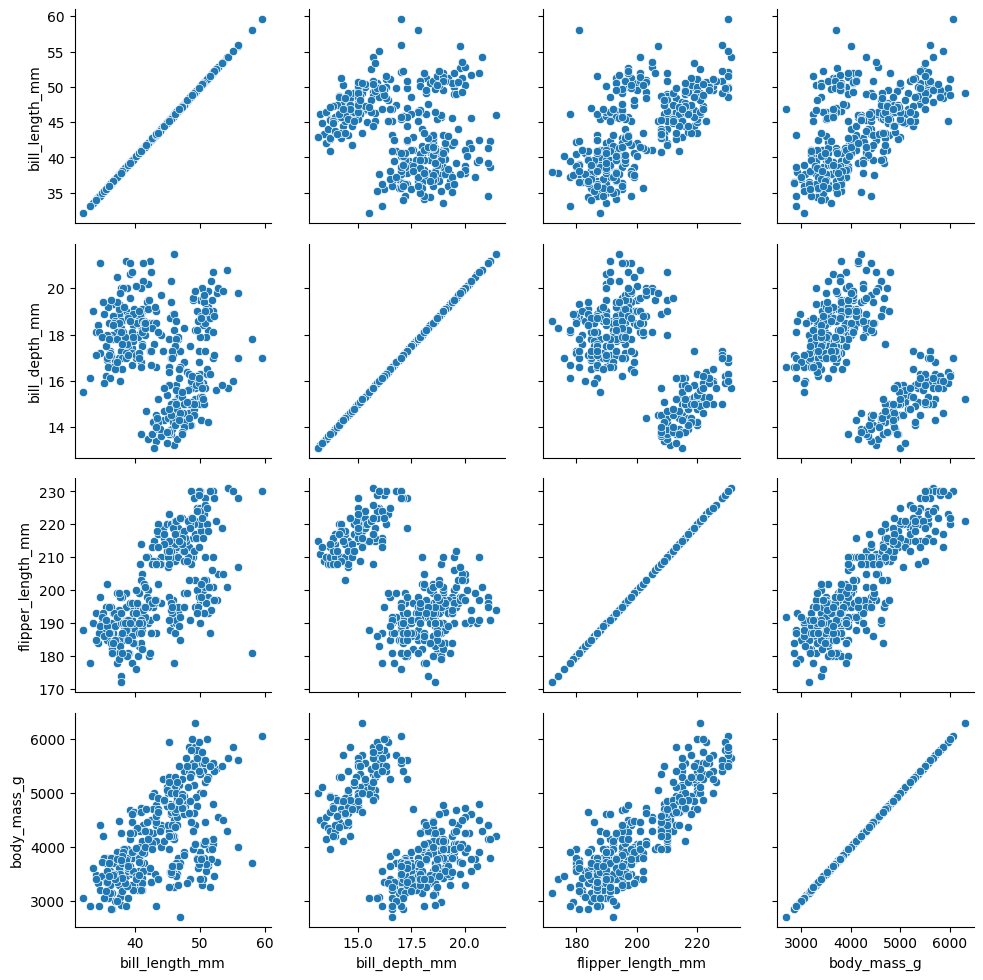

In [43]:
g = sns.PairGrid(df[['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']])
g.map(sns.scatterplot);

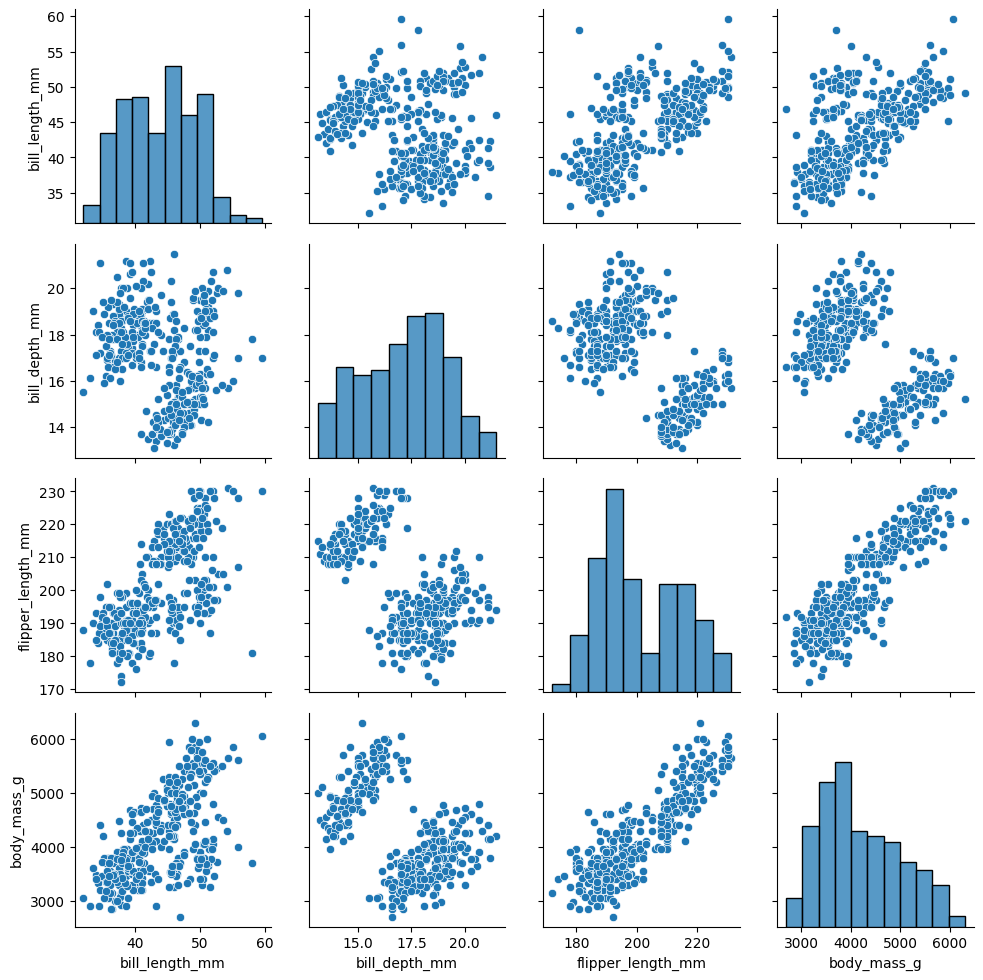

In [44]:
g = sns.PairGrid(df[['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

''

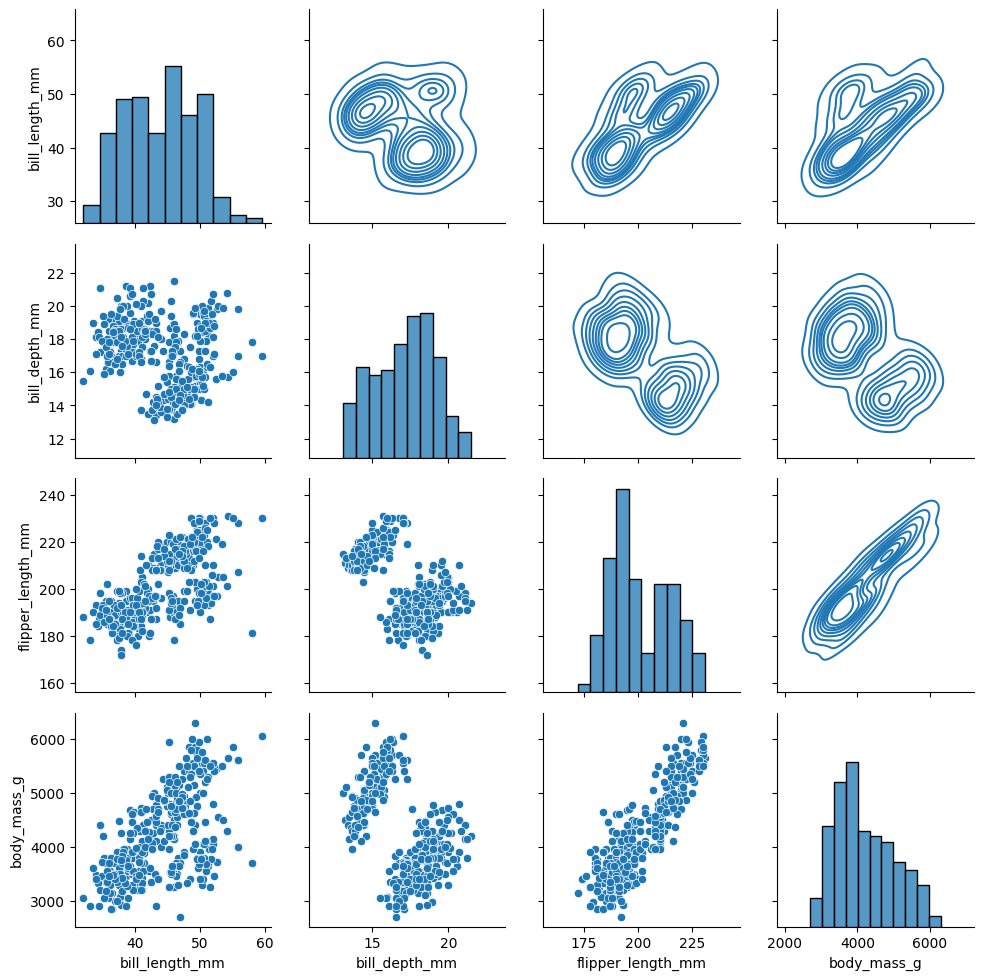

In [45]:
g = sns.PairGrid(df[['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
;

In [46]:
df_corr = df.corr().round(2)
df_corr

<ipython-input-46-a05449bca5d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().round(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


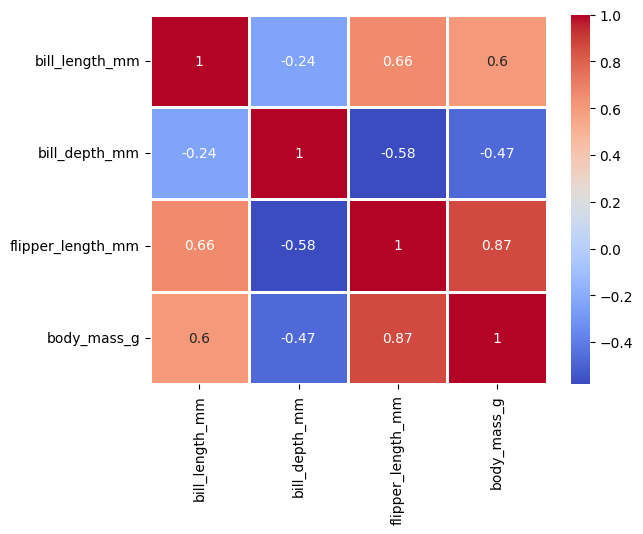

In [47]:
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm', linewidths = 1);        # cmap - цветовая гамма, linewidths - толщина линии между квадратами

''

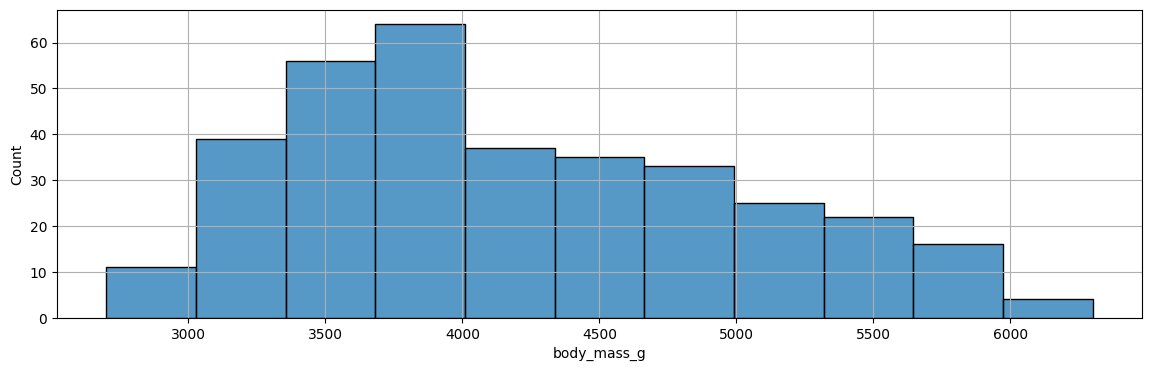

In [48]:
plt.figure(figsize = (14, 4))
sns.histplot(data = df, x = 'body_mass_g')

# plt.title('Распределение по возрастам домов')
# plt.ylabel('Количество')
# plt.xlabel('Средний возраст домов')
# plt.xticks(range(0, 55))        # градация сетки по х
# plt.yticks(range(0, 200, 10))   # градация сетки по у
plt.grid()                      # сетка

;

''

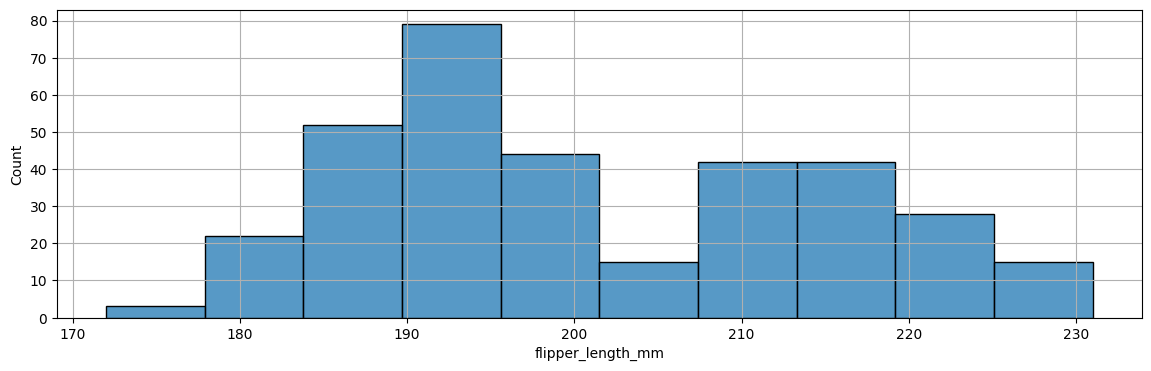

In [49]:
plt.figure(figsize = (14, 4))
sns.histplot(data = df, x = 'flipper_length_mm')

# plt.title('Распределение по возрастам домов')
# plt.ylabel('Количество')
# plt.xlabel('Средний возраст домов')
# plt.xticks(range(0, 55))        # градация сетки по х
# plt.yticks(range(0, 200, 10))   # градация сетки по у
plt.grid()                      # сетка

;

**Задача** **№67**. Решение в группах
1. Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.
high - длинный(от 42)
middle - средний(от 35 до 42)
low - маленький(до 35)

In [50]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [52]:
df.loc[df['bill_length_mm'] >= 42, 'height_group'] = 'height'
df.loc[(df['bill_length_mm'] >= 35) & (df['bill_length_mm'] < 42), 'height_group'] = 'middle'
df.loc[df['bill_length_mm'] < 35, 'height_group'] = 'low'
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,height_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,height
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,height
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,height


**Задача №69**. Решение в группах
1. Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ

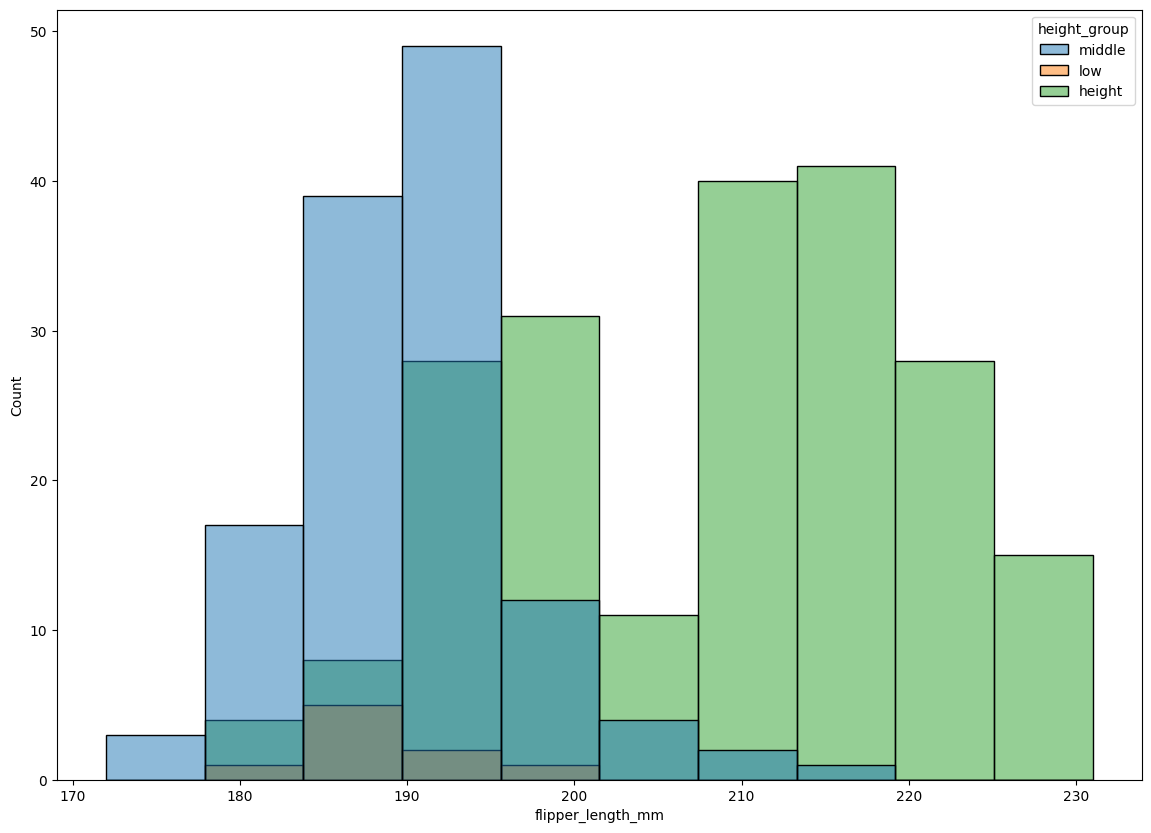

In [55]:
plt.figure(figsize = (14, 10))
sns.histplot(data = df, x = 'flipper_length_mm', hue = 'height_group');